<a href="https://colab.research.google.com/github/Swathi1309/ED18B034_ME18B133_Assignment1/blob/main/Assignment2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv1D,Conv2D, BatchNormalization, Dropout, Activation, Softmax, MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam,RMSprop
import numpy as np
import pandas as pd
import os
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split

classes = ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia']

Mounted at /content/drive


In [9]:
tf.__version__

'2.4.1'

In [2]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Initializing the TPU system: grpc://10.2.98.58:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.2.98.58:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]


In [3]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [2]:
!pip install wandb
!wandb login

     |████████████████████████████████| 2.1MB 19.0MB/s 
     |████████████████████████████████| 133kB 54.8MB/s 
     |████████████████████████████████| 102kB 11.5MB/s 
     |████████████████████████████████| 163kB 49.8MB/s 
     |████████████████████████████████| 71kB 10.3MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=07f31b02153332c8254dfe52b81859019b9c3d8566cc3ff4421093a8136976b0
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=bfe976944240b2437686b8db3fcc84ad27c8c2376fbd69777aa49fffecce4a06
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: 

In [3]:
import wandb
wandb.init(project="CS6910-assg2", entity="swathi")

wandb: Currently logged in as: swathi (use `wandb login --relogin` to force relogin)


In [4]:
def load_train_data(dir, augment= True):
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    samplewise_center = 0,
    horizontal_flip = True,
    rotation_range = 30,
    validation_split = 0.1)
  val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    samplewise_center = 0,
    validation_split = 0.1)
  if (augment ==True):
    train_dataset = train_datagen.flow_from_directory(
      dir,
      batch_size=256,
      classes = ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia'],
      class_mode='categorical',
      subset = 'training',
      seed = 0)
  else:
    train_dataset = val_datagen.flow_from_directory(
      dir,
      batch_size=256,
      classes = ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia'],
      class_mode='categorical',
      subset = 'training',
      seed = 0)
  val_dataset = val_datagen.flow_from_directory(
    dir,
    batch_size=256,
    classes = ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia'],
    class_mode='categorical',
    subset = 'validation',
    seed = 0)
  
  return train_dataset, val_dataset

In [ ]:
x,y = train_generator.next()

In [16]:
print (x.shape)

(32, 256, 256, 3)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


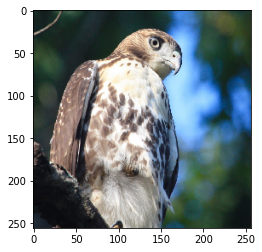

In [18]:
plt.imshow(x[10])
print (y[10])

In [ ]:
print (type(train_generator))

In [5]:
def CNN_wo_BN(filter_matrix, kernel_matrix, activation_matrix, fdropout=0, dense_no=512, learning_rate=0.001):

  # Input layer
  X_input = keras.Input(shape=(256,256,3))

  # Layer 1
  X = Conv2D(filter_matrix[0], kernel_matrix[0])(X_input)
  X = Activation(activation_matrix[0])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 2
  X = Conv2D(filter_matrix[1], kernel_matrix[1])(X)
  X = Activation(activation_matrix[1])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 3
  X = Conv2D(filter_matrix[2], kernel_matrix[2])(X)
  X = Activation(activation_matrix[2])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 4
  X = Conv2D(filter_matrix[3], kernel_matrix[3])(X)
  X = Activation(activation_matrix[3])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 5
  X = Conv2D(filter_matrix[4], kernel_matrix[4])(X)
  X = Activation(activation_matrix[4])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  X = Flatten()(X)
  X = Dense(dense_no,activation=activation_matrix[5])(X)
  X = Dropout(fdropout)(X)
  X = Dense(10,activation='softmax')(X)
  
  model=Model(inputs=X_input,outputs=X)
  model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy',  metrics=['accuracy'])

  return model

In [6]:
def CNN_w_BN(filter_matrix, kernel_matrix, activation_matrix, fdropout=0, dense_no=512, learning_rate=0.001):

  # Input layer
  X_input = keras.Input(shape=(256,256,3))

  # Layer 1
  X = Conv2D(filter_matrix[0], kernel_matrix[0])(X_input)
  X = BatchNormalization()(X)
  X = Activation(activation_matrix[0])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 2
  X = Conv2D(filter_matrix[1], kernel_matrix[1])(X)
  X = BatchNormalization()(X)
  X = Activation(activation_matrix[1])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 3
  X = Conv2D(filter_matrix[2], kernel_matrix[2])(X)
  X = BatchNormalization()(X)
  X = Activation(activation_matrix[2])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 4
  X = Conv2D(filter_matrix[3], kernel_matrix[3])(X)
  X = BatchNormalization()(X)
  X = Activation(activation_matrix[3])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  # Layer 5
  X = Conv2D(filter_matrix[4], kernel_matrix[4])(X)
  X = BatchNormalization()(X)
  X = Activation(activation_matrix[4])(X)
  X = MaxPooling2D(pool_size=(2, 2))(X)

  X = Flatten()(X)
  X = Dense(dense_no,activation=activation_matrix[5])(X)
  X = Dropout(fdropout)(X)
  X = Dense(10,activation='softmax')(X)
  
  model=Model(inputs=X_input,outputs=X)
  model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy',  metrics=['accuracy'])

  return model

In [7]:
def model_choose(highest_filter, filter_type, kernel_matrix, activation_matrix, dropout=0, dense_no=512, batch_norm=True, learning_rate=0.001):
  if filter_type == 'constant':
    filter_matrix = [filter_start]*4
  elif filter_type == 'doubling':
    filter_matrix = [highest_filter/16, highest_filter/8, highest_filter/4, highest_filter/2, highest_filter]
  elif filter_type == 'halving':
    filter_matrix = [highest_filter, highest_filter/2, highest_filter/4, highest_filter/8, highest_filter/16]
  # wandb.log({"Filters": filter_matrix})

  if batch_norm == True:
    model = CNN_w_BN(filter_matrix, kernel_matrix, activation_matrix, dropout, dense_no, learning_rate)
  else:
    model = CNN_wo_BN(filter_matrix, kernel_matrix, activation_matrix, dropout, dense_no, learning_rate)
  
  return model


In [ ]:
# Checking all above functions
X=tf.random.normal((227,227,3))
filter_matrix = [32, 64, 256, 512, 1024]
kernel_matrix = [(3,3)]*5
activation_matrix = ['relu']*6;
model = model_choose(X, 1024, 'doubling', kernel_matrix, activation_matrix)
model.summary()

In [ ]:
@tf.custom_gradient
def GBRelu(x):
  def gradient(dy):
    grad = tf.cast(dy>0,"float32")*tf.cast(x>0, "float32")*dy
    return  grad
  return tf.nn.relu(x), gradient
# Here model is the best model
GBModel = Model(inputs = [model.inputs],outputs = [model.get_layer(index=8).output]) # Here the index is to be checked
layer_dict = [layer for layer in gb_model.layers[1:] if hasattr(layer,'activation')]
for layer in layer_dict:
  if layer.activation == tf.keras.activations.relu:
    layer.activation = GBRelu

with tf.GradientTape() as tape:
  inputs = tf.cast(X_input, tf.float32)
  tape.watch(inputs)
  outputs = GBModel(inputs)

grads = tape.gradient(outputs,inputs)[0]

In [8]:
import pprint

In [9]:
sweep_config = {
    'method': 'grid'
    }
parameters_dict = {
    'highest_filter':{
        'values': [1024]
      },
    'kernel_matrix': {
        'values': [0]
      },
    'learn_rate': {
        'values': [1e-3]
      },
    'epochs': {
        'values': [15,30]
      },
    'batch_size': {
        'values': [256]
      },
    'dropout': {
        'values': [0.2]
      },
    'batch_normalization': {
        'values': [True, False]
      },
    'dense_number': {
          'values': [512]
      },
    'augmentation':{
        'values' : [True]
    }
}
sweep_config['parameters'] = parameters_dict
pprint.pprint(sweep_config)

def training_sweep(config=None):
    with wandb.init(config=config):
        config = wandb.config
        kernels = [[(3,3)]*5]
        global K
        K = kernels[config.kernel_matrix]
        activation_matrix = ['relu']*6
        model = model_choose(config.highest_filter, 'doubling', K, activation_matrix, config.dropout, config.dense_number, config.batch_normalization, config.learn_rate)
        train, val = load_train_data('/content/drive/MyDrive/inaturalist_12K/train', config.augmentation)
        history = model.fit(train, 
                            epochs=config.epochs,
                            validation_data = val,
                            )
        wandb.log(history.history)

{'method': 'grid',
 'parameters': {'augmentation': {'values': [True]},
                'batch_normalization': {'values': [True, False]},
                'batch_size': {'values': [256]},
                'dense_number': {'values': [512]},
                'dropout': {'values': [0.2]},
                'epochs': {'values': [15, 30]},
                'highest_filter': {'values': [1024]},
                'kernel_matrix': {'values': [0]},
                'learn_rate': {'values': [0.001]}}}


In [10]:
sweep_id = wandb.sweep(sweep_config, project="CS6910-assg2")
wandb.agent(sweep_id, training_sweep)

wandb: Ctrl + C detected. Stopping sweep.


In [14]:
@tf.function
def train_model(model, train, val):
  history = model.fit(train, 
                      epochs=5,
                      validation_data = val,
                      )
  return history

In [ ]:
k = [(3,3)]*5
activation_matrix = ['relu']*6

train, val = load_train_data('/content/drive/MyDrive/inaturalist_12K/train', True)
#history = strategy.run(train_model, args=(model,train,val))

with strategy.scope():
  model = model_choose(1024, 'doubling', k, activation_matrix, 0, 512, True, 0.001)

model.fit(train, 
          epochs=5,
          validation_data = val,
          )